In [1]:

# Task 2: Exploratory Data Analysis (EDA) - Titanic Dataset

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:

# Load Dataset
df = pd.read_csv('Cleaned-Titanic-Dataset.csv')

# 1. Basic Exploration
print("Dataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  839 non-null    int64  
 1   Survived     839 non-null    int64  
 2   First Name   839 non-null    object 
 3   Last Name    839 non-null    object 
 4   Pclass       839 non-null    int64  
 5   Age          839 non-null    float64
 6   SibSp        839 non-null    int64  
 7   Parch        839 non-null    int64  
 8   Ticket       839 non-null    object 
 9   Fare         839 non-null    float64
 10  Sex_male     839 non-null    int64  
 11  Embarked_Q   839 non-null    int64  
 12  Embarked_S   839 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 85.3+ KB
None


In [3]:
print(df.describe(include='all'))

        PassengerId    Survived First Name Last Name      Pclass  \
count    839.000000  839.000000        839       839  839.000000   
unique          NaN         NaN        730       654         NaN   
top             NaN         NaN       Mrs.    Carter         NaN   
freq            NaN         NaN         14         6         NaN   
mean     446.742551    0.398093        NaN       NaN    2.265793   
std      254.851088    0.489797        NaN       NaN    0.843145   
min        1.000000    0.000000        NaN       NaN    1.000000   
25%      229.500000    0.000000        NaN       NaN    1.000000   
50%      447.000000    0.000000        NaN       NaN    3.000000   
75%      665.500000    1.000000        NaN       NaN    3.000000   
max      891.000000    1.000000        NaN       NaN    3.000000   

                 Age       SibSp       Parch        Ticket          Fare  \
count   8.390000e+02  839.000000  839.000000           839  8.390000e+02   
unique           NaN         Na

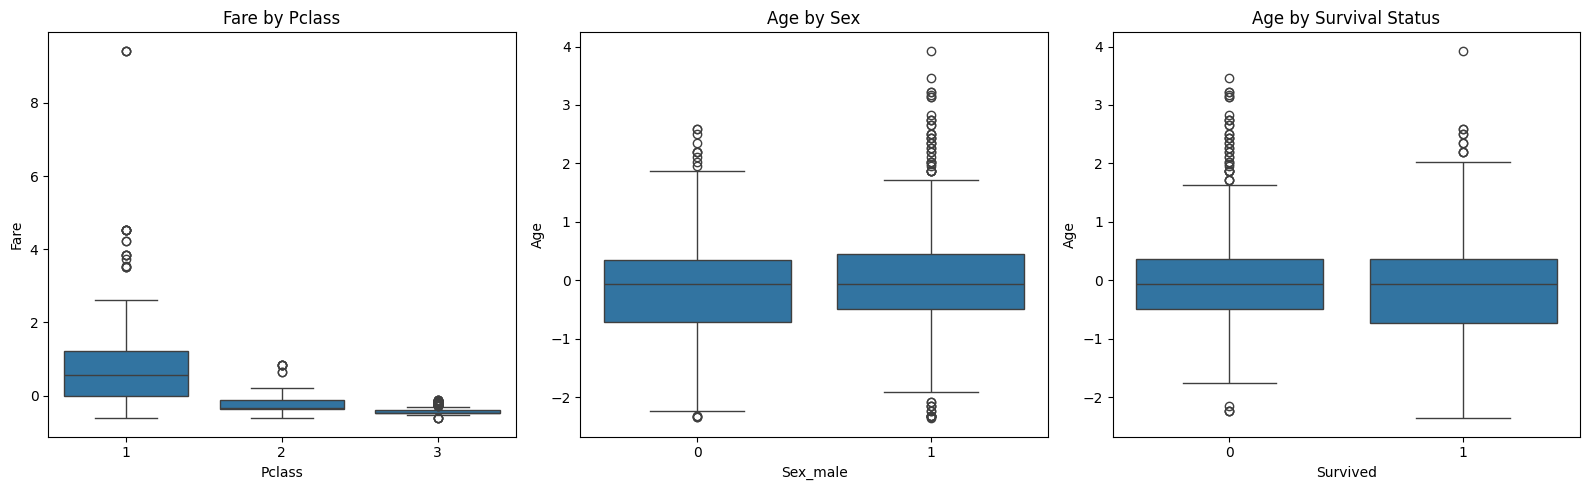

In [4]:
# 3. Boxplots for Numerical vs Categorical
plt.figure(figsize=(16, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Pclass")

plt.subplot(1, 3, 2)
sns.boxplot(x='Sex_male', y='Age', data=df)
plt.title("Age by Sex")

plt.subplot(1, 3, 3)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age by Survival Status")

plt.tight_layout()
plt.show()

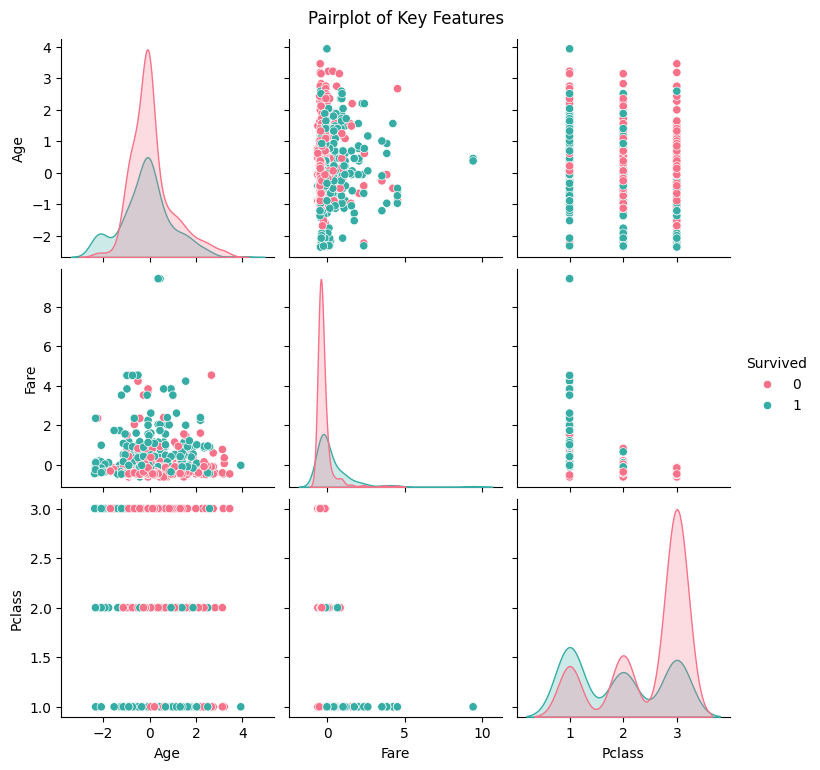

In [5]:
# 3. Pairplot & Correlation Matrix
pair_cols = ['Age', 'Fare', 'Pclass', 'Survived']
sns.pairplot(df[pair_cols], hue='Survived', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


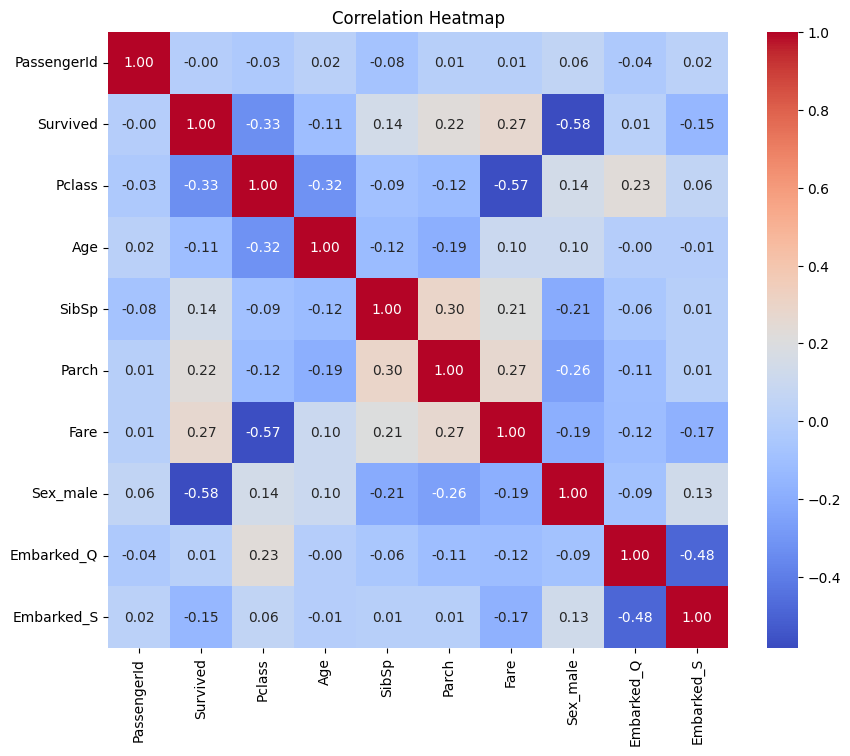

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

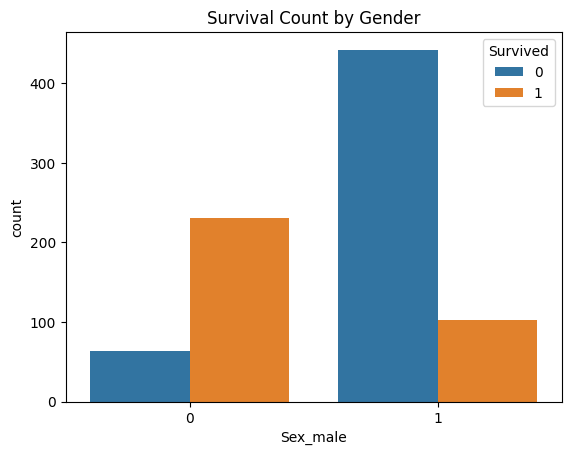

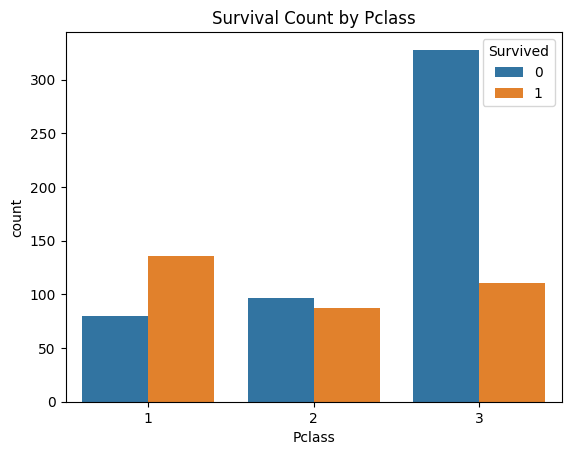

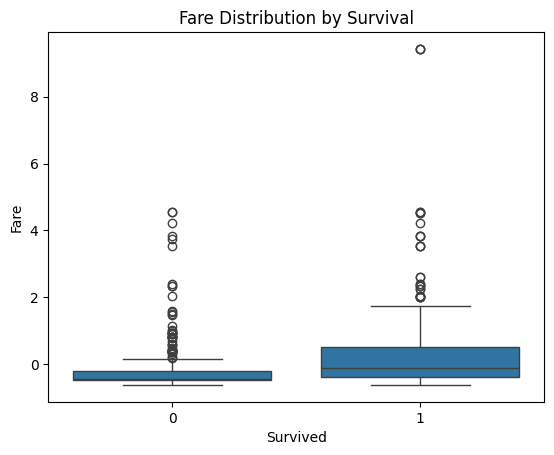

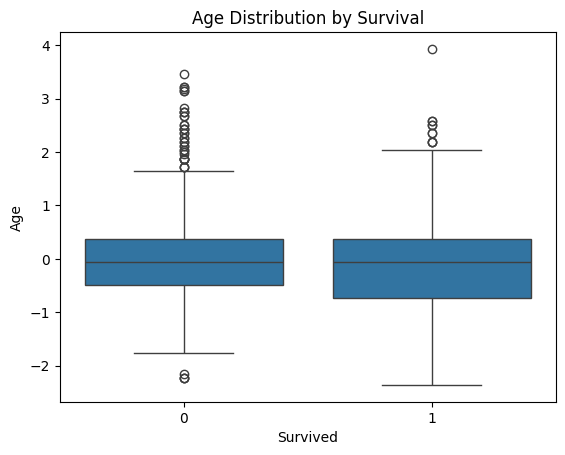

In [7]:
# 4 & 5. Identify patterns, trends, and make inferences

# Example pattern 1: Survival by Gender
sns.countplot(x='Sex_male', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Example pattern 2: Survival by Passenger Class
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival Count by Pclass")
plt.show()

# Example pattern 3: Fare vs Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()

# Example pattern 4: Age vs Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

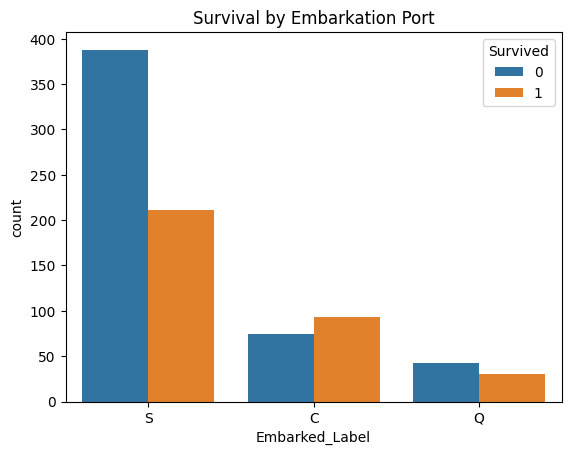

In [8]:
def decode_embarked(row):
    if row['Embarked_Q'] == 1:
        return 'Q'
    elif row['Embarked_S'] == 1:
        return 'S'
    else:
        return 'C'  # dropped category

df['Embarked_Label'] = df.apply(decode_embarked, axis=1)

# Now you can use countplot
sns.countplot(x='Embarked_Label', hue='Survived', data=df)
plt.title("Survival by Embarkation Port")
plt.show()
